In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
db = pd.read_csv("./diabetes(1).csv")
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
db = db.drop_duplicates(keep='first', ignore_index=True)
db.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Outcome
0    500
1    268
Name: count, dtype: int64


Text(0.5, 1.0, 'Bar Plot of Outcome Variable Counts')

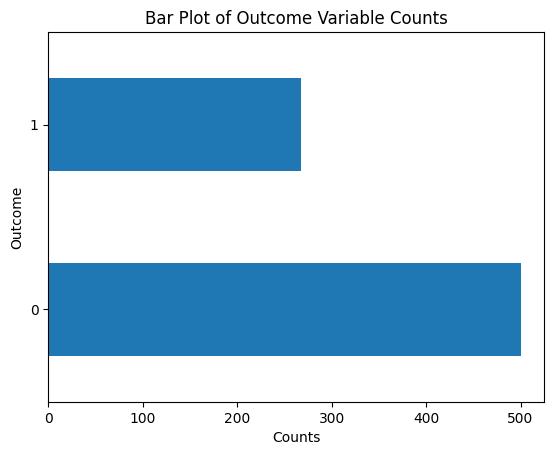

In [18]:
counts = db['Outcome'].value_counts()
print(counts)
counts.sort_index().plot(kind='barh', xlabel="Counts")
plt.title("Bar Plot of Outcome Variable Counts")

In [19]:
#checking unique values
variables = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
for i in variables:
    print(db[i].unique())

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]
[  0  94 168  88 543 846 175 230  83  96 235 

In [20]:
##checking 0 values per predictor

variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in variables:
    c = 0
    for x in (db[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


In [21]:
#replacing the missing values with the mean
variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in variables:
    db[i].replace(0,db[i].mean(),inplace=True)

#checking to make sure that incorrect values are replace
for i in variables:
    c = 0
    for x in (db[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0


/var/folders/45/2hpygfr52kx59bmwvtkfv1h00000gn/T/ipykernel_22675/3322919786.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db[i].replace(0,db[i].mean(),inplace=True)


In [22]:
#missing values
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [23]:
#checking descriptive statistics
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


# EDA

/Users/evant/Documents/Personal/aisc/AISC-SQ2024-Beginner-Project/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/evant/Documents/Personal/aisc/AISC-SQ2024-Beginner-Project/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/evant/Documents/Personal/aisc/AISC-SQ2024-Beginner-Project/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


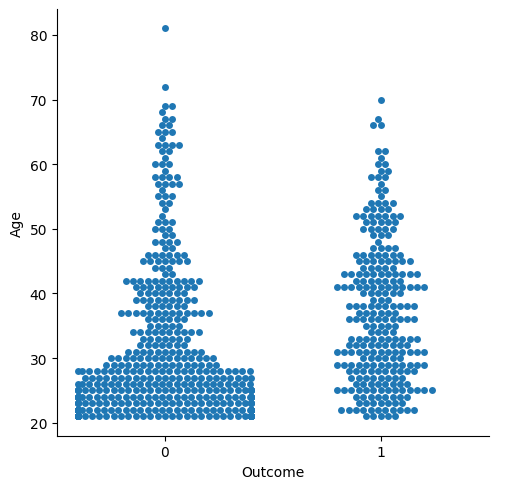

In [25]:
sns.catplot(x="Outcome", y="Age", kind="swarm", data=db)

people aged 20-30 are least susceptible to diabetes

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

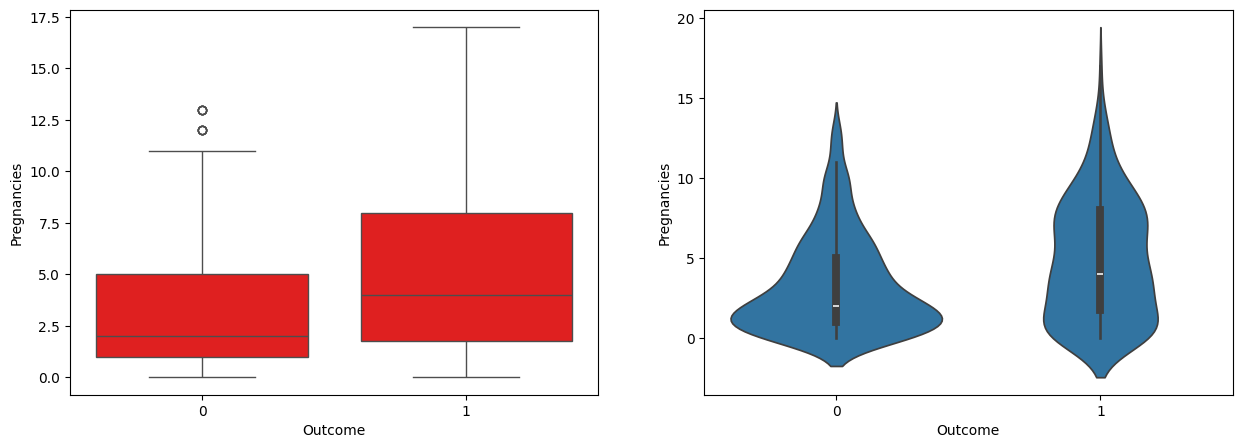

In [26]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='Pregnancies',data=db,ax=ax[0], color='red')
sns.violinplot(x='Outcome',y='Pregnancies',data=db,ax=ax[1])

Text(0.5, 1.0, 'Glucose vs Diabetes')

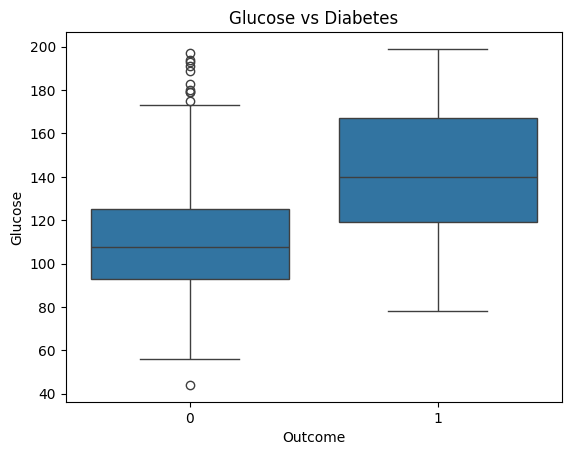

In [27]:
sns.boxplot(x='Outcome', y='Glucose', data=db).set_title('Glucose vs Diabetes')

 ### Model 1- Neural Network

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [30]:
db_nn = db[['Outcome','BMI','DiabetesPedigreeFunction', 'Glucose', 'Age', 'BloodPressure' ]]

In [31]:
x = db_nn.drop('Outcome', axis = 1)
y = db_nn['Outcome']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1, random_state = 1)

In [32]:
mlp = MLPClassifier(hidden_layer_sizes = (20, 10),
                    learning_rate_init = 0.001,
                    max_iter = 1000,
                    activation = 'relu',
                    solver = 'sgd',
                    batch_size = 50,
                    random_state = 1)

mlp.fit(xtrain, ytrain)
pred = mlp.predict(xtest)

In [33]:
print(classification_report(ytest, pred,
                           digits = 4,
                           target_names = ["0", "1"],
                           zero_division = 1))

              precision    recall  f1-score   support

           0     0.7547    0.8333    0.7921        48
           1     0.6667    0.5517    0.6038        29

    accuracy                         0.7273        77
   macro avg     0.7107    0.6925    0.6979        77
weighted avg     0.7216    0.7273    0.7212        77



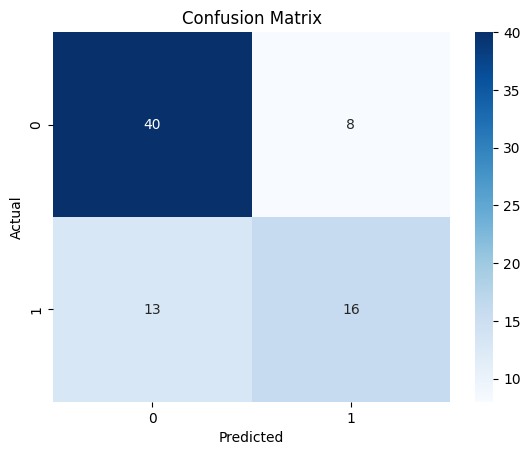

In [34]:
cm = confusion_matrix(ytest, pred)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

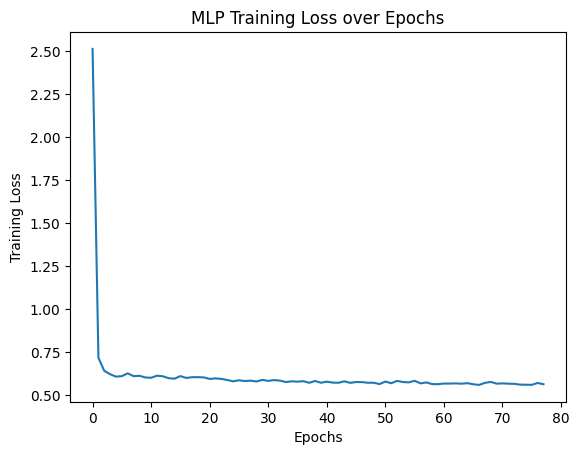

In [35]:
plt.plot(mlp.loss_curve_)
plt.title("MLP Training Loss over Epochs")
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show()

### Model 2: Random Forest

In [36]:
x = db_nn.drop('Outcome', axis = 1)

scaler = MinMaxScaler(feature_range = (0, 1))
xresc = scaler.fit_transform(x)
x = pd.DataFrame(data = xresc, columns = x.columns)

y = db_nn['Outcome']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1, random_state = 1)

In [37]:
rf_clf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy',
                                min_samples_split = 18, random_state = 1)
rf_clf.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', min_samples_split=18,
                       n_estimators=200, random_state=1)

In [38]:
pred = rf_clf.predict(xtest)

In [39]:
accuracy = accuracy_score(ytest, pred)
print(f"Accuracy: {accuracy:.4f}")
print(f'Training MSE: {round(mean_squared_error(rf_clf.predict(xtrain), ytrain), 4)}')
print(f'Testing MSE: {round(mean_squared_error(pred, ytest), 4)}')

Accuracy: 0.7922
Training MSE: 0.0883
Testing MSE: 0.2078


In [40]:
print(classification_report(ytest, pred,
                            digits = 4,
                            target_names = ["0", "1"],
                            zero_division = 1))

              precision    recall  f1-score   support

           0     0.8200    0.8542    0.8367        48
           1     0.7407    0.6897    0.7143        29

    accuracy                         0.7922        77
   macro avg     0.7804    0.7719    0.7755        77
weighted avg     0.7901    0.7922    0.7906        77



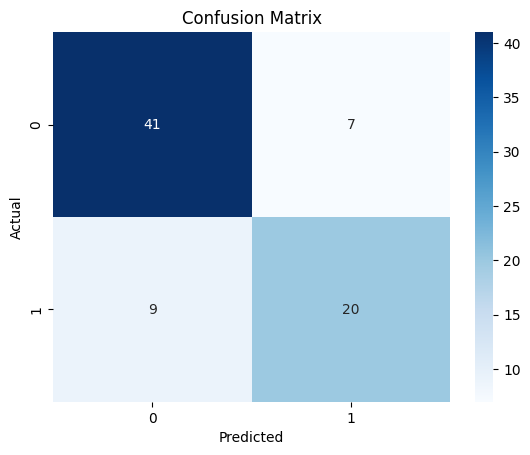

In [41]:
cm = confusion_matrix(ytest, pred)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# XGBoost

In [43]:
import xgboost as xgb

In [44]:
xgb_clf = xgb.XGBClassifier(n_estimators = 90, learning_rate = 0.35, 
                            max_depth = 3, seed = 1)
xgb_clf.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.35, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=90, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
pred = xgb_clf.predict(xtest)
print(xtest.head(10))
print(pred)

          BMI  DiabetesPedigreeFunction   Glucose       Age  BloodPressure
285  0.159509                  0.242955  0.593548  0.500000       0.510204
101  0.161554                  0.043126  0.690323  0.016667       0.367347
581  0.139059                  0.054654  0.419355  0.100000       0.367347
352  0.331288                  0.070453  0.109677  0.416667       0.591837
726  0.366053                  0.178480  0.464516  0.066667       0.551020
472  0.421268                  0.077284  0.483871  0.016667       0.428571
233  0.343558                  0.134927  0.503226  0.133333       0.448980
385  0.083845                  0.054227  0.483871  0.050000       0.306122
556  0.406953                  0.059778  0.341935  0.150000       0.469388
59   0.476483                  0.040564  0.393548  0.016667       0.408163
[1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0
 0 0 1]


In [46]:
print(f'Training MSE: {round(mean_squared_error(xgb_clf.predict(xtrain), ytrain), 4)}')
print(f'Testing MSE: {round(mean_squared_error(pred, ytest), 4)}')

Training MSE: 0.0376
Testing MSE: 0.2338


In [47]:
print(classification_report(ytest, pred,
                            digits = 4,
                            target_names = ["No Diabetes", "Diabetes"],
                            zero_division = 1))

              precision    recall  f1-score   support

 No Diabetes     0.7885    0.8542    0.8200        48
    Diabetes     0.7200    0.6207    0.6667        29

    accuracy                         0.7662        77
   macro avg     0.7542    0.7374    0.7433        77
weighted avg     0.7627    0.7662    0.7623        77



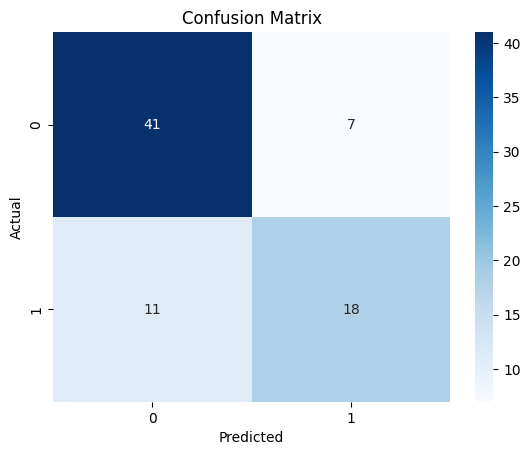

Accuracy: 0.7662


In [48]:
cm = confusion_matrix(ytest, pred)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

acc = accuracy_score(ytest, pred)
print(f"Accuracy: {acc:.4f}")

### Model #4

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression(random_state=42)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

In [51]:
accuracy = accuracy_score(ytest, y_pred)
conf_matrix = confusion_matrix(ytest, y_pred)
class_report = classification_report(ytest, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.78
[[44  4]
 [13 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        48
           1       0.80      0.55      0.65        29

    accuracy                           0.78        77
   macro avg       0.79      0.73      0.75        77
weighted avg       0.78      0.78      0.77        77



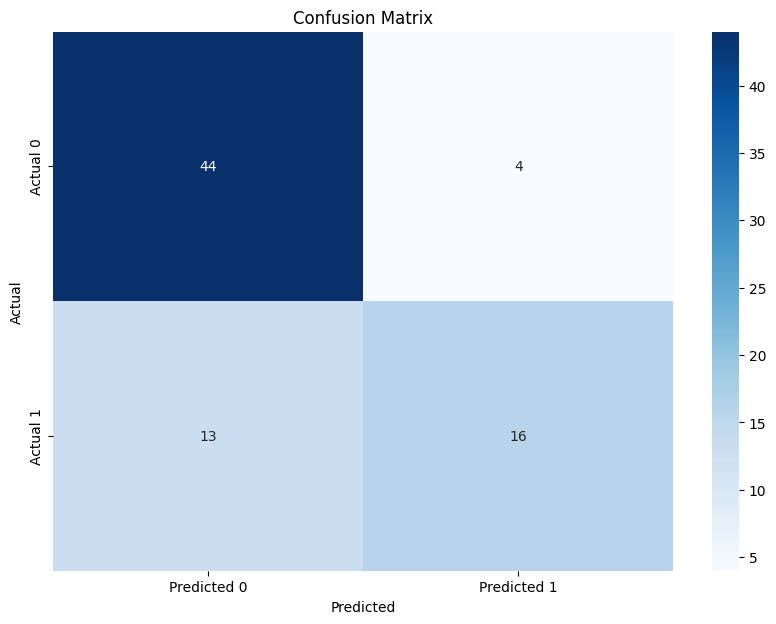

In [52]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
import pickle

In [55]:
with open('log_model.pkl', 'wb') as file:
    pickle.dump(model, file)
